In [1]:
!pip install numpy matplotlib scikit-fuzzy

   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/920.8 kB ? eta -:--:--
   ---------------------------------------- 920.8/920.8 kB 5.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
#Установка необходимых библиотек
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import warnings
warnings.filterwarnings('ignore')

print(" Биб✅лиотеки успешно загружены!")

✅ Библиотеки успешно загружены!


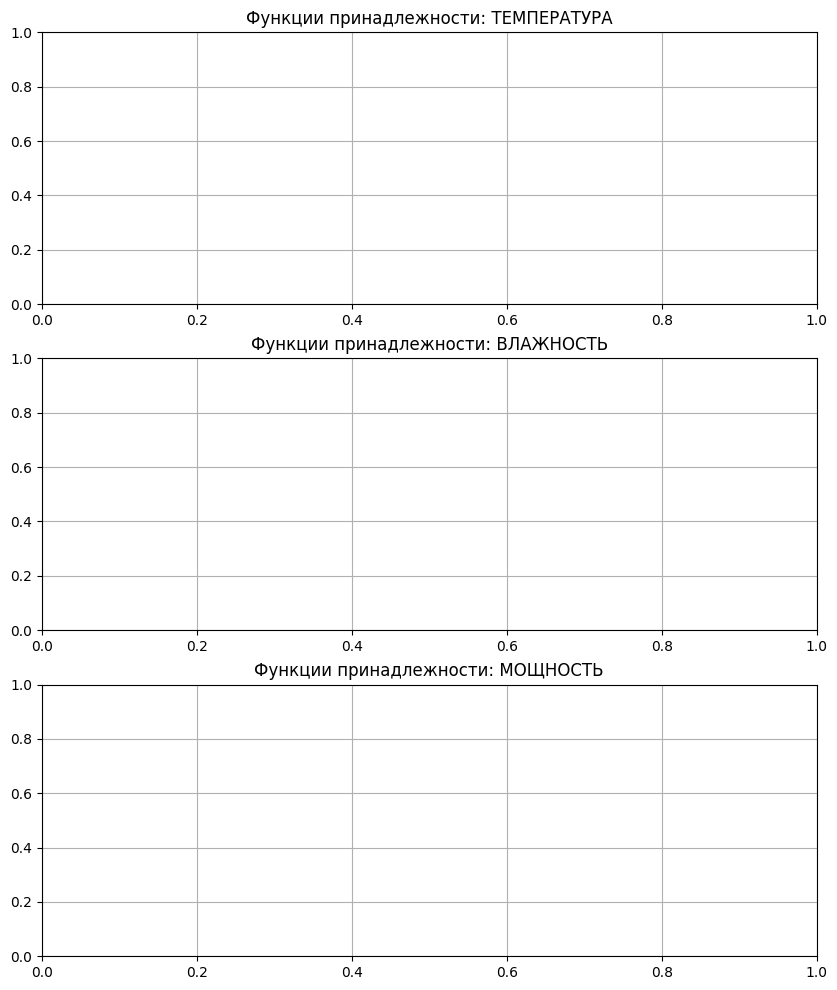

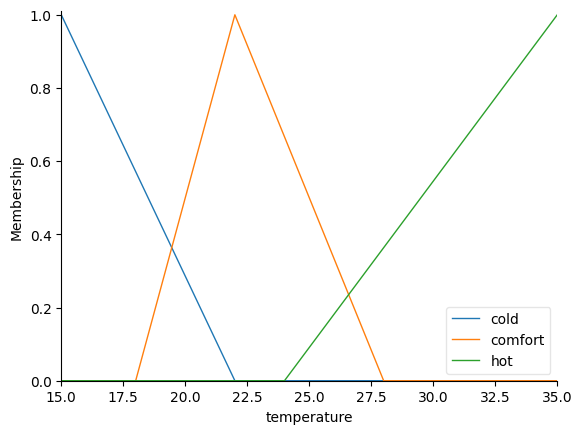

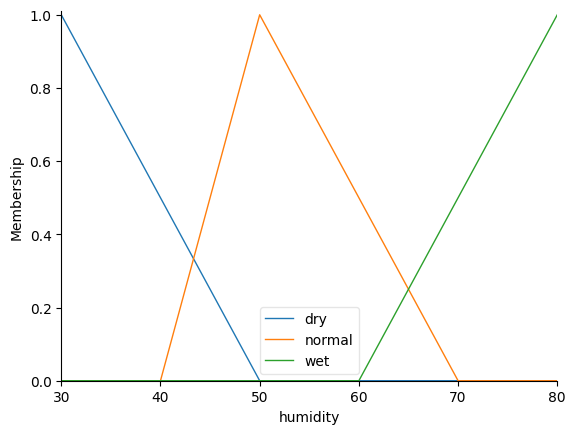

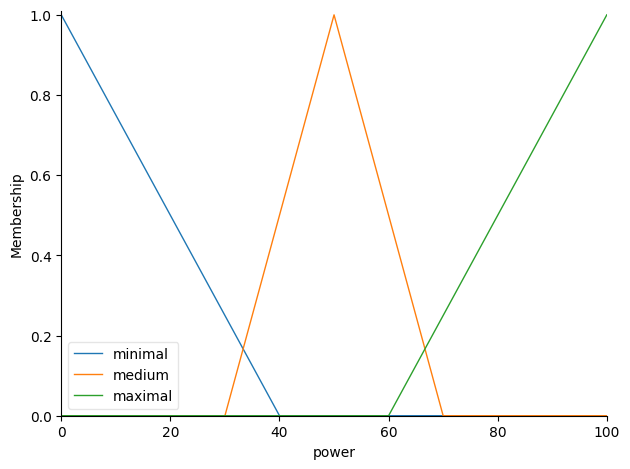

In [4]:
#2. Определение нечетких переменных и функций принадлежности
# Создание универсумов (диапазонов значений)
temperature = ctrl.Antecedent(np.arange(15, 36, 1), 'temperature')  # 15-35°C
humidity = ctrl.Antecedent(np.arange(30, 81, 1), 'humidity')        # 30-80%
power = ctrl.Consequent(np.arange(0, 101, 1), 'power')              # 0-100%

# Функции принадлежности для ТЕМПЕРАТУРЫ
temperature['cold'] = fuzz.trimf(temperature.universe, [15, 15, 22])
temperature['comfort'] = fuzz.trimf(temperature.universe, [18, 22, 28])
temperature['hot'] = fuzz.trimf(temperature.universe, [24, 35, 35])

# Функции принадлежности для ВЛАЖНОСТИ
humidity['dry'] = fuzz.trimf(humidity.universe, [30, 30, 50])
humidity['normal'] = fuzz.trimf(humidity.universe, [40, 50, 70])
humidity['wet'] = fuzz.trimf(humidity.universe, [60, 80, 80])

# Функции принадлежности для МОЩНОСТИ
power['minimal'] = fuzz.trimf(power.universe, [0, 0, 40])
power['medium'] = fuzz.trimf(power.universe, [30, 50, 70])
power['maximal'] = fuzz.trimf(power.universe, [60, 100, 100])

# Визуализация функций принадлежности
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))

temperature.view(ax=ax1)
ax1.set_title('Функции принадлежности: ТЕМПЕРАТУРА')
ax1.grid(True)

humidity.view(ax=ax2)
ax2.set_title('Функции принадлежности: ВЛАЖНОСТЬ')
ax2.grid(True)

power.view(ax=ax3)
ax3.set_title('Функции принадлежности: МОЩНОСТЬ')
ax3.grid(True)

plt.tight_layout()
plt.show()

In [5]:
#3. Создание базы нечетких правил
# База из 9 нечетких правил
rule1 = ctrl.Rule(temperature['cold'] & humidity['dry'], power['minimal'])
rule2 = ctrl.Rule(temperature['cold'] & humidity['normal'], power['minimal'])
rule3 = ctrl.Rule(temperature['cold'] & humidity['wet'], power['medium'])
rule4 = ctrl.Rule(temperature['comfort'] & humidity['dry'], power['minimal'])
rule5 = ctrl.Rule(temperature['comfort'] & humidity['normal'], power['medium'])
rule6 = ctrl.Rule(temperature['comfort'] & humidity['wet'], power['medium'])
rule7 = ctrl.Rule(temperature['hot'] & humidity['dry'], power['medium'])
rule8 = ctrl.Rule(temperature['hot'] & humidity['normal'], power['maximal'])
rule9 = ctrl.Rule(temperature['hot'] & humidity['wet'], power['maximal'])

rules = [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9]

print("✅ Создано 9 нечетких правил:")
for i, rule in enumerate(rules, 1):
    print(f"Правило {i}: {rule}")

✅ Создано 9 нечетких правил:
Правило 1: IF temperature[cold] AND humidity[dry] THEN power[minimal]
	AND aggregation function : fmin
	OR aggregation function  : fmax
Правило 2: IF temperature[cold] AND humidity[normal] THEN power[minimal]
	AND aggregation function : fmin
	OR aggregation function  : fmax
Правило 3: IF temperature[cold] AND humidity[wet] THEN power[medium]
	AND aggregation function : fmin
	OR aggregation function  : fmax
Правило 4: IF temperature[comfort] AND humidity[dry] THEN power[minimal]
	AND aggregation function : fmin
	OR aggregation function  : fmax
Правило 5: IF temperature[comfort] AND humidity[normal] THEN power[medium]
	AND aggregation function : fmin
	OR aggregation function  : fmax
Правило 6: IF temperature[comfort] AND humidity[wet] THEN power[medium]
	AND aggregation function : fmin
	OR aggregation function  : fmax
Правило 7: IF temperature[hot] AND humidity[dry] THEN power[medium]
	AND aggregation function : fmin
	OR aggregation function  : fmax
Правило 8

In [6]:
#4. Создание и тестирование системы управления

=== ТЕСТ 1: Основной пример ===
Входные параметры:
  • Температура: 26°C
  • Влажность: 65%
Результат: Мощность компрессора = 63.6%


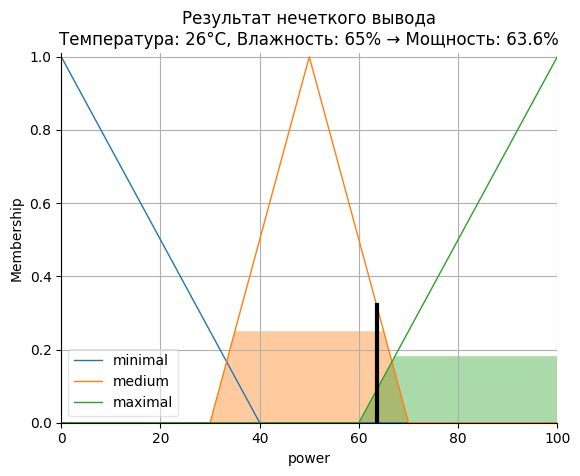

In [10]:
# Создание системы управления
power_ctrl = ctrl.ControlSystem(rules)
power_system = ctrl.ControlSystemSimulation(power_ctrl)

# ТЕСТ 1: Пример из задания (T=26°C, H=65%)
print("=== ТЕСТ 1: Основной пример ===")

# Устанавливаем входные значения
T_input = 26
H_input = 65

power_system.input['temperature'] = T_input
power_system.input['humidity'] = H_input

# Вычисление результата
power_system.compute()
result = power_system.output['power']

print("Входные параметры:")
print(f"  • Температура: {T_input}°C")  # Используем исходные переменные
print(f"  • Влажность: {H_input}%")     # Используем исходные переменные
print(f"Результат: Мощность компрессора = {result:.1f}%")  # .1f вместо .lf

# Визуализация результата
power.view(sim=power_system)  # = вместо -
plt.title(f'Результат нечеткого вывода\nТемпература: {T_input}°C, Влажность: {H_input}% → Мощность: {result:.1f}%')
plt.grid(True)
plt.show()

In [11]:
#5. Детальный анализ расчета

In [12]:
# Детальный расчет степеней принадлежности для тестового случая
def detailed_calculation(T, H):
    print(f"\n=== ДЕТАЛЬНЫЙ РАСЧЕТ для T={T}°C, H={H}% ===")
    
    # Фаззификация температуры
    mu_cold = fuzz.interp_membership(temperature.universe, temperature['cold'].mf, T)
    mu_comfort = fuzz.interp_membership(temperature.universe, temperature['comfort'].mf, T)
    mu_hot = fuzz.interp_membership(temperature.universe, temperature['hot'].mf, T)
    
    print(f"Температура {T}°C:")
    print(f"  • μ_холодно = {mu_cold:.3f}")
    print(f"  • μ_комфортно = {mu_comfort:.3f}")
    print(f"  • μ_жарко = {mu_hot:.3f}")
    
    # Фаззификация влажности
    mu_dry = fuzz.interp_membership(humidity.universe, humidity['dry'].mf, H)
    mu_normal = fuzz.interp_membership(humidity.universe, humidity['normal'].mf, H)
    mu_wet = fuzz.interp_membership(humidity.universe, humidity['wet'].mf, H)
    
    print(f"Влажность {H}%:")
    print(f"  • μ_сухо = {mu_dry:.3f}")
    print(f"  • μ_нормально = {mu_normal:.3f}")
    print(f"  • μ_влажно = {mu_wet:.3f}")
    
    # Расчет степеней истинности правил
    rules_strength = {
        'Правило 1 (холодно+сухо)': np.fmin(mu_cold, mu_dry),
        'Правило 2 (холодно+нормально)': np.fmin(mu_cold, mu_normal),
        'Правило 3 (холодно+влажно)': np.fmin(mu_cold, mu_wet),
        'Правило 4 (комфортно+сухо)': np.fmin(mu_comfort, mu_dry),
        'Правило 5 (комфортно+нормально)': np.fmin(mu_comfort, mu_normal),
        'Правило 6 (комфортно+влажно)': np.fmin(mu_comfort, mu_wet),
        'Правило 7 (жарко+сухо)': np.fmin(mu_hot, mu_dry),
        'Правило 8 (жарко+нормально)': np.fmin(mu_hot, mu_normal),
        'Правило 9 (жарко+влажно)': np.fmin(mu_hot, mu_wet)
    }
    
    print("\nСтепени истинности правил:")
    for rule, strength in rules_strength.items():
        if strength > 0:
            print(f"  • {rule}: {strength:.3f}")
    
    return rules_strength

# Детальный расчет для нашего примера
rules_strength = detailed_calculation(26, 65)


=== ДЕТАЛЬНЫЙ РАСЧЕТ для T=26°C, H=65% ===
Температура 26°C:
  • μ_холодно = 0.000
  • μ_комфортно = 0.333
  • μ_жарко = 0.182
Влажность 65%:
  • μ_сухо = 0.000
  • μ_нормально = 0.250
  • μ_влажно = 0.250

Степени истинности правил:
  • Правило 5 (комфортно+нормально): 0.250
  • Правило 6 (комфортно+влажно): 0.250
  • Правило 8 (жарко+нормально): 0.182
  • Правило 9 (жарко+влажно): 0.182


In [13]:
#6. Множественные тестовые случаи

=== ТЕСТИРОВАНИЕ СИСТЕМЫ НА РАЗНЫХ ВХОДАХ ===

Холодно и сухо:
  Температура: 18°C, Влажность: 40%
  → Мощность: 15.6%

Комфортно и нормально:
  Температура: 22°C, Влажность: 50%
  → Мощность: 50.0%

Тепло и влажно:
  Температура: 26°C, Влажность: 65%
  → Мощность: 63.6%

Жарко и очень влажно:
  Температура: 30°C, Влажность: 75%
  → Мощность: 84.8%

Прохладно и нормально:
  Температура: 20°C, Влажность: 45%
  → Мощность: 37.2%


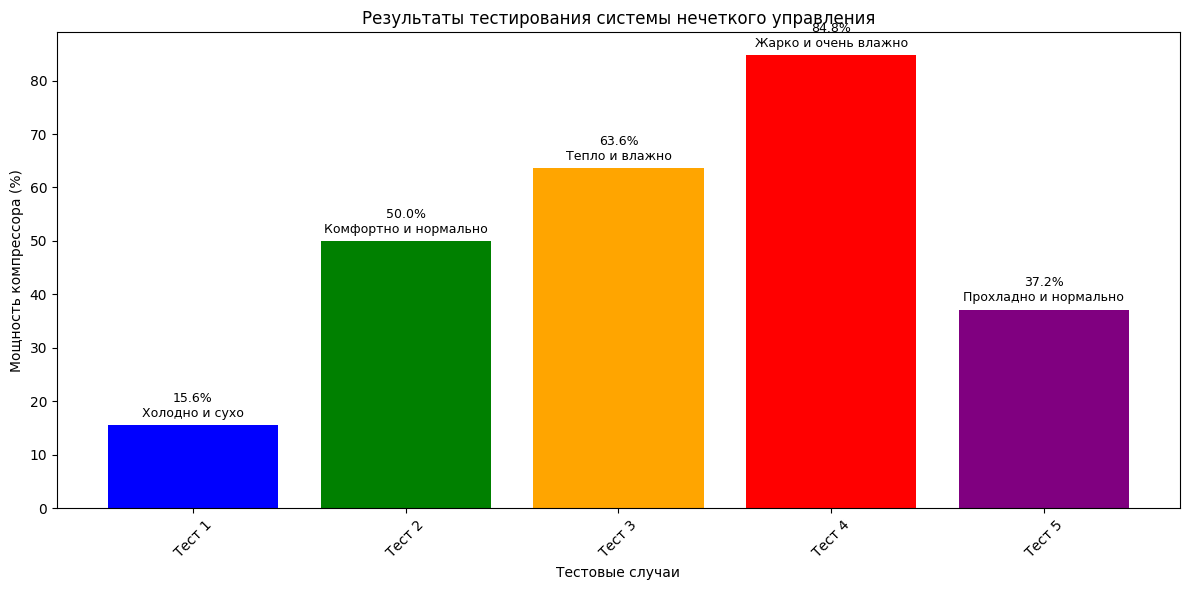

In [14]:
# Тестирование системы на различных входных данных
test_cases = [
    (18, 40, "Холодно и сухо"),
    (22, 50, "Комфортно и нормально"),
    (26, 65, "Тепло и влажно"),
    (30, 75, "Жарко и очень влажно"),
    (20, 45, "Прохладно и нормально")
]

print("=== ТЕСТИРОВАНИЕ СИСТЕМЫ НА РАЗНЫХ ВХОДАХ ===")
results = []

for T, H, description in test_cases:
    power_system.input['temperature'] = T
    power_system.input['humidity'] = H
    power_system.compute()
    power_output = power_system.output['power']
    results.append((T, H, power_output, description))
    
    print(f"\n{description}:")
    print(f"  Температура: {T}°C, Влажность: {H}%")
    print(f"  → Мощность: {power_output:.1f}%")

# Визуализация всех результатов
fig, ax = plt.subplots(figsize=(12, 6))
x = range(len(results))
power_values = [r[2] for r in results]
descriptions = [r[3] for r in results]

bars = ax.bar(x, power_values, color=['blue', 'green', 'orange', 'red', 'purple'])
ax.set_xlabel('Тестовые случаи')
ax.set_ylabel('Мощность компрессора (%)')
ax.set_title('Результаты тестирования системы нечеткого управления')
ax.set_xticks(x)
ax.set_xticklabels([f'Тест {i+1}' for i in x], rotation=45)

# Добавление значений на столбцы
for bar, value, desc in zip(bars, power_values, descriptions):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{value:.1f}%\n{desc}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


In [15]:
#7. 3D визуализация поверхности принятия решений

=== ГЕНЕРАЦИЯ 3D ПОВЕРХНОСТИ РЕШЕНИЙ ===


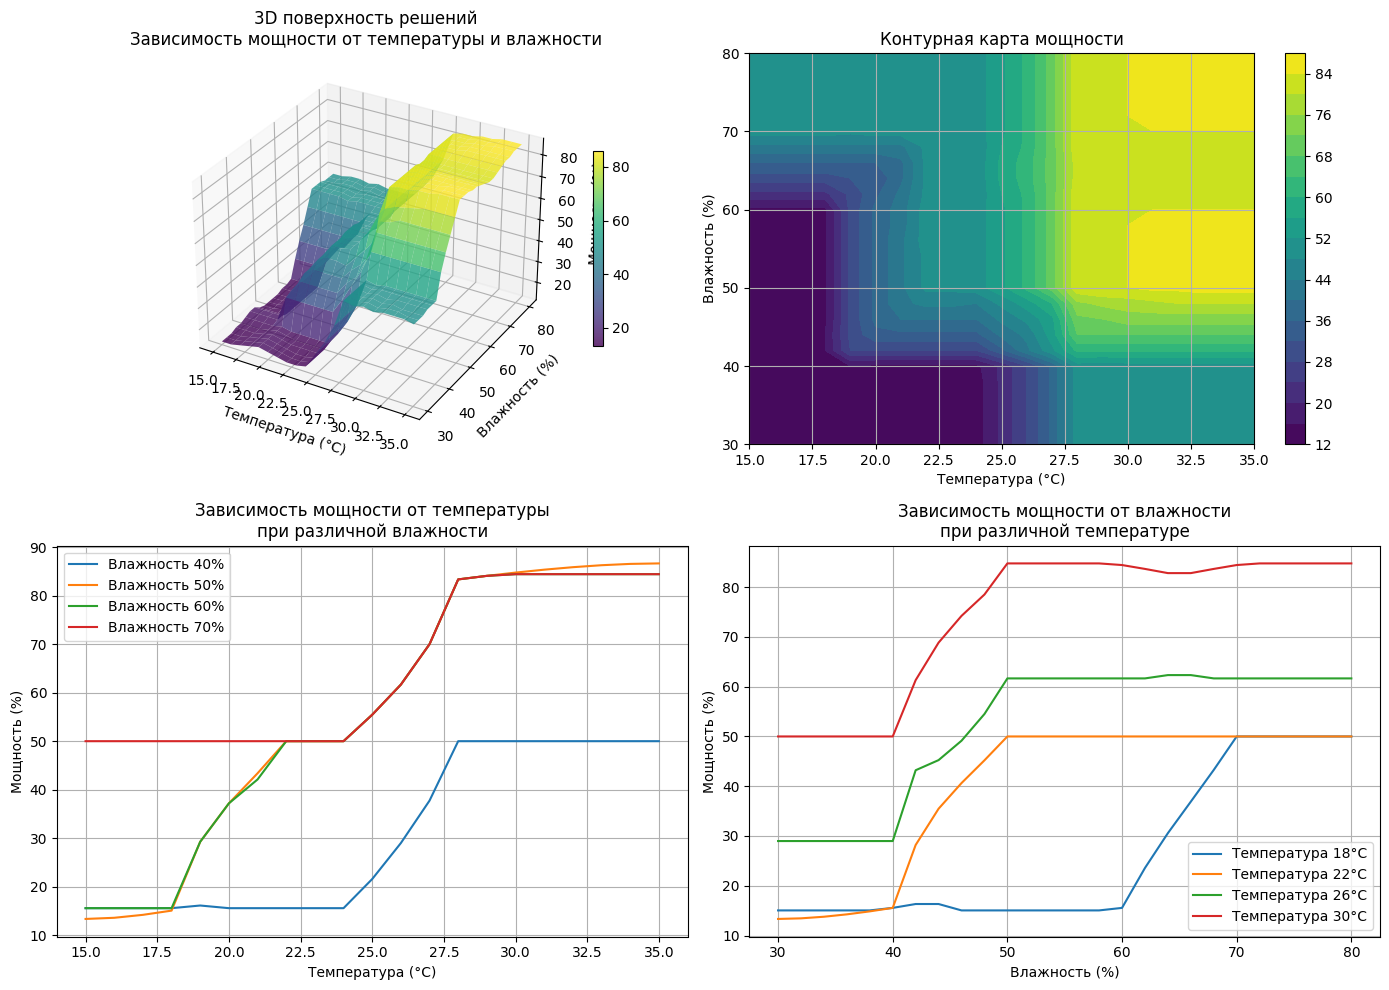

In [16]:
# Создание 3D поверхности решений
print("=== ГЕНЕРАЦИЯ 3D ПОВЕРХНОСТИ РЕШЕНИЙ ===")

# Сетка входных значений
T_range = np.arange(15, 36, 1)
H_range = np.arange(30, 81, 2)
T_grid, H_grid = np.meshgrid(T_range, H_range)
power_grid = np.zeros_like(T_grid)

# Расчет мощности для каждой точки сетки
for i in range(len(H_range)):
    for j in range(len(T_range)):
        try:
            power_system.input['temperature'] = T_grid[i, j]
            power_system.input['humidity'] = H_grid[i, j]
            power_system.compute()
            power_grid[i, j] = power_system.output['power']
        except:
            power_grid[i, j] = 0

# 3D график
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 10))

# 3D поверхность
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
surf = ax1.plot_surface(T_grid, H_grid, power_grid, cmap='viridis', alpha=0.8)
ax1.set_xlabel('Температура (°C)')
ax1.set_ylabel('Влажность (%)')
ax1.set_zlabel('Мощность (%)')
ax1.set_title('3D поверхность решений\nЗависимость мощности от температуры и влажности')
fig.colorbar(surf, ax=ax1, shrink=0.5)

# Контурный график
ax2 = fig.add_subplot(2, 2, 2)
contour = ax2.contourf(T_grid, H_grid, power_grid, levels=20, cmap='viridis')
ax2.set_xlabel('Температура (°C)')
ax2.set_ylabel('Влажность (%)')
ax2.set_title('Контурная карта мощности')
ax2.grid(True)
fig.colorbar(contour, ax=ax2)

# График зависимости мощности от температуры при фиксированной влажности
ax3 = fig.add_subplot(2, 2, 3)
for humidity_val in [40, 50, 60, 70]:
    power_values = []
    for temp in T_range:
        power_system.input['temperature'] = temp
        power_system.input['humidity'] = humidity_val
        power_system.compute()
        power_values.append(power_system.output['power'])
    ax3.plot(T_range, power_values, label=f'Влажность {humidity_val}%')
ax3.set_xlabel('Температура (°C)')
ax3.set_ylabel('Мощность (%)')
ax3.set_title('Зависимость мощности от температуры\nпри различной влажности')
ax3.legend()
ax3.grid(True)

# График зависимости мощности от влажности при фиксированной температуре
ax4 = fig.add_subplot(2, 2, 4)
for temp_val in [18, 22, 26, 30]:
    power_values = []
    for humidity in H_range:
        power_system.input['temperature'] = temp_val
        power_system.input['humidity'] = humidity
        power_system.compute()
        power_values.append(power_system.output['power'])
    ax4.plot(H_range, power_values, label=f'Температура {temp_val}°C')
ax4.set_xlabel('Влажность (%)')
ax4.set_ylabel('Мощность (%)')
ax4.set_title('Зависимость мощности от влажности\nпри различной температуре')
ax4.legend()
ax4.grid(True)

plt.tight_layout()
plt.show()

In [17]:
#8. Интерактивный тестер системы

In [18]:
# Интерактивная функция для тестирования любых значений
def test_fuzzy_system():
    print("=== ИНТЕРАКТИВНЫЙ ТЕСТЕР СИСТЕМЫ ===")
    print("Введите параметры для расчета мощности сплит-системы:")
    
    try:
        T = float(input("Температура (15-35°C): "))
        H = float(input("Влажность (30-80%): "))
        
        if not (15 <= T <= 35) or not (30 <= H <= 80):
            print("Ошибка: значения вне допустимого диапазона!")
            return
        
        # Расчет
        power_system.input['temperature'] = T
        power_system.input['humidity'] = H
        power_system.compute()
        result = power_system.output['power']
        
        print(f"\n📊 РЕЗУЛЬТАТ РАСЧЕТА:")
        print(f"   Температура: {T}°C")
        print(f"   Влажность: {H}%")
        print(f"   → Рекомендуемая мощность: {result:.1f}%")
        
        # Детальный анализ
        detailed_calculation(T, H)
        
        # Визуализация
        plt.figure(figsize=(10, 4))
        power.view(sim=power_system)
        plt.title(f'Результат для T={T}°C, H={H}% → Мощность: {result:.1f}%')
        plt.grid(True)
        plt.show()
        
    except ValueError:
        print("Ошибка: введите числовые значения!")
    except Exception as e:
        print(f"Ошибка расчета: {e}")

# Запуск интерактивного тестера
test_fuzzy_system()

=== ИНТЕРАКТИВНЫЙ ТЕСТЕР СИСТЕМЫ ===
Введите параметры для расчета мощности сплит-системы:


Температура (15-35°C):  21
Влажность (30-80%):  52



📊 РЕЗУЛЬТАТ РАСЧЕТА:
   Температура: 21.0°C
   Влажность: 52.0%
   → Рекомендуемая мощность: 43.4%

=== ДЕТАЛЬНЫЙ РАСЧЕТ для T=21.0°C, H=52.0% ===
Температура 21.0°C:
  • μ_холодно = 0.143
  • μ_комфортно = 0.750
  • μ_жарко = 0.000
Ошибка расчета: 'numpy.int64' object has no attribute 'universe'
